# **TK89910-Prioritising Hospital Admission according to emergency using machine Learning**

# **import Statements**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv(r'EDAdmissionDataset.csv')

In [3]:
data.head()

,hospital,sex,age,patient_num_hr,arrival_mode,injury,complaint,mental,pain,pain_scale,...,saturation,KTAS_RN,diagnosis,result,KTAS_expert,error_code,stay_min,KTAS_duration_min,mistriage,admissions
0,1,1,71,3,car,1,right ocular pain,1,1,2,...,100.0,2,Corneal abrasion,discharge,4,physical_exam,86,5.00,1,0
1,0,0,56,12,car,1,right forearm burn,1,1,2,...,NaN,4,"Burn of hand, firts degree dorsum",discharge,5,pain,64,3.95,1,0
2,1,0,68,8,ambulance,1,"arm pain, Lt",1,1,2,...,98.0,4,"Fracture of surgical neck of humerus, closed",ward,5,pain,862,1.00,1,1
3,0,1,71,8,walking,0,ascites tapping,1,1,3,...,NaN,4,Alcoholic liver cirrhosis with ascites,discharge,5,underlying,108,9.83,1,0
4,0,1,58,4,car,0,"distension, abd",1,1,3,...,NaN,4,Ascites,discharge,5,on_set,109,6.60,1,0


In [4]:
data.tail()

,hospital,sex,age,patient_num_hr,arrival_mode,injury,complaint,mental,pain,pain_scale,...,saturation,KTAS_RN,diagnosis,result,KTAS_expert,error_code,stay_min,KTAS_duration_min,mistriage,admissions
81083,1,1,79,5,ambulance,0,mental change,1,0,0,...,95.0,2,Cerebral infarction due to unspecified occlusi...,ward,2,no_error,1995,3.0,0,1
81084,1,1,81,2,car,0,dysuria,1,0,0,...,97.0,4,Dysuria,discharge,4,no_error,1000,2.0,0,0
81085,1,1,81,17,ambulance,0,dizziness,1,0,0,...,99.0,3,Dizziness and giddiness,discharge,3,no_error,310,4.0,0,0
81086,1,0,81,2,ambulance,1,"Sensory, Decreased",1,0,0,...,98.0,3,"Cord compression, unspecified",op,3,no_error,475,5.0,0,1
81087,1,1,87,8,private_ambulance,0,orthopnea,1,0,0,...,98.0,3,Dyspnoea,ward,3,no_error,887,2.0,0,1


# **Information about Data set**

In [5]:
# check the shape of the data set
data.shape

(81088, 25)

In [6]:
# show the what are the column thare in this data set
data.columns

Index(['hospital', 'sex', 'age', 'patient_num_hr', 'arrival_mode', 'injury',
       'complaint', 'mental', 'pain', 'pain_scale', 'SBP', 'DBP', 'HR', 'RR',
       'BT', 'saturation', 'KTAS_RN', 'diagnosis', 'result', 'KTAS_expert',
       'error_code', 'stay_min', 'KTAS_duration_min', 'mistriage',
       'admissions'],
      dtype='object')

In [7]:
# check the information about column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81088 entries, 0 to 81087
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hospital           81088 non-null  int64  
 1   sex                81088 non-null  int64  
 2   age                81088 non-null  int64  
 3   patient_num_hr     81088 non-null  int64  
 4   arrival_mode       81088 non-null  object 
 5   injury             81088 non-null  int64  
 6   complaint          81088 non-null  object 
 7   mental             81088 non-null  int64  
 8   pain               81088 non-null  int64  
 9   pain_scale         81088 non-null  int64  
 10  SBP                81088 non-null  int64  
 11  DBP                81088 non-null  int64  
 12  HR                 81088 non-null  int64  
 13  RR                 81088 non-null  int64  
 14  BT                 81088 non-null  float64
 15  saturation         37056 non-null  float64
 16  KTAS_RN            810

In [8]:
# check the null value
data.isnull().sum()

hospital                 0
sex                      0
age                      0
patient_num_hr           0
arrival_mode             0
injury                   0
complaint                0
mental                   0
pain                     0
pain_scale               0
SBP                      0
DBP                      0
HR                       0
RR                       0
BT                       0
saturation           44032
KTAS_RN                  0
diagnosis              128
result                   0
KTAS_expert              0
error_code               0
stay_min                 0
KTAS_duration_min        0
mistriage                0
admissions               0
dtype: int64

In [9]:
# check the duplicate value
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
81083     True
81084     True
81085     True
81086     True
81087     True
Length: 81088, dtype: bool

In [10]:
# check the values of target column
data['admissions'].value_counts()

admissions
0    53248
1    27840
Name: count, dtype: int64

## **EDA**

<AxesSubplot:xlabel='admissions', ylabel='Count'>

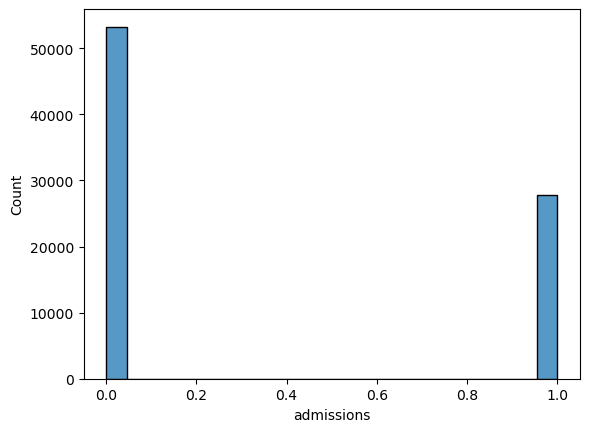

In [ ]:
sns.histplot(data["admissions"])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='admissions', ylabel='count'>

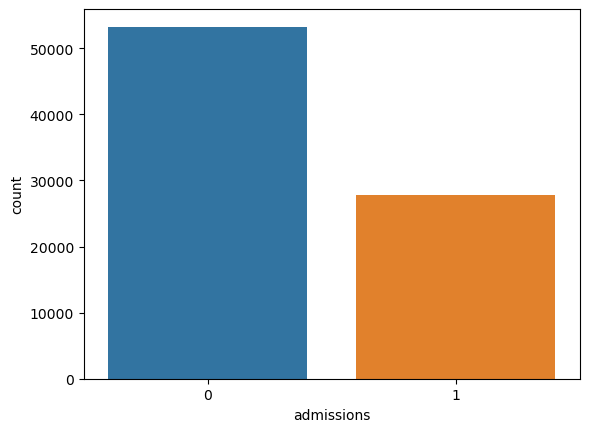

In [ ]:
sns.countplot(data['admissions'])

<AxesSubplot:xlabel='age', ylabel='Count'>

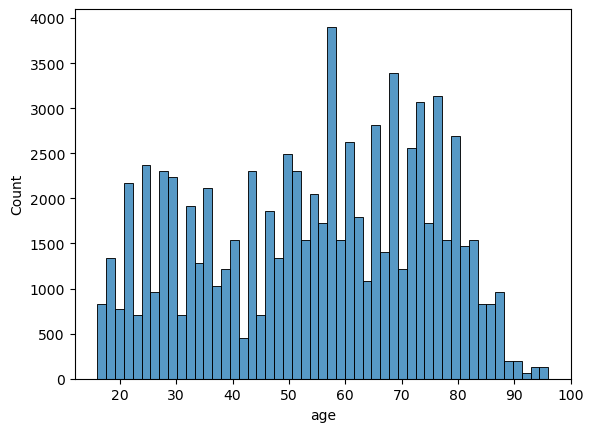

In [ ]:
sns.histplot(data["age"])

<AxesSubplot:xlabel='sex', ylabel='Count'>

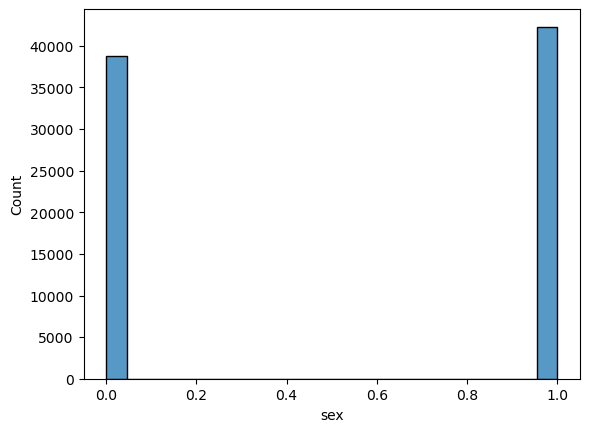

In [ ]:
sns.histplot(data["sex"])

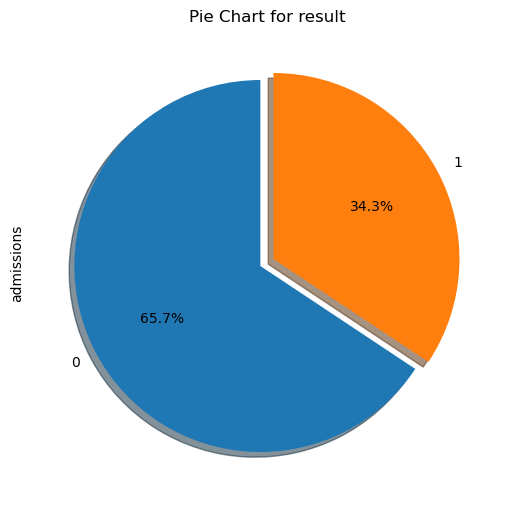

In [ ]:
data['admissions'].value_counts().plot.pie(explode=[0.04,0.04], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(6,8))
plt.title('Pie Chart for result')
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='admissions', ylabel='Density'>

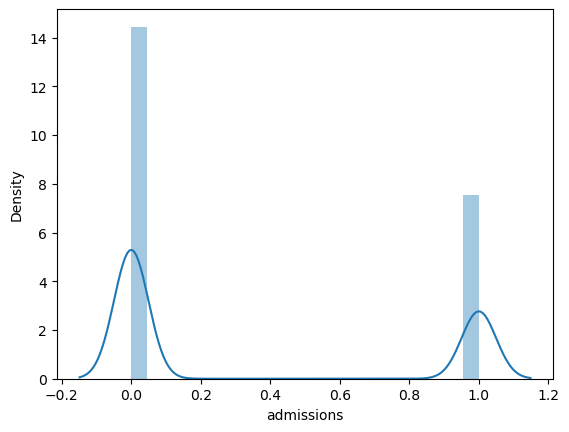

In [ ]:
sns.distplot(data['admissions'])

# **Preprocessing**

In [12]:
data.isnull().sum().sum()

np.int64(44160)

In [13]:
# apply the type costing
data['arrival_mode'] = data['arrival_mode'].astype('str')
data['complaint'] = data['complaint'].astype('str')   
data['diagnosis'] = data['diagnosis'].astype('str')
data['result'] = data['result'].astype('str')
data['error_code'] = data['error_code'].astype('str')

In [14]:
le = LabelEncoder()

In [15]:
# Apply The Label Encoding
data['arrival_mode'] = pd.Series(le.fit_transform(data['arrival_mode']))
data['complaint'] = pd.Series(le.fit_transform(data['complaint']))
data['diagnosis'] = pd.Series(le.fit_transform(data['diagnosis']))
data['result'] = pd.Series(le.fit_transform(data['result']))
data['error_code'] = pd.Series(le.fit_transform(data['error_code']))


In [16]:
data['saturation'] = data['saturation'].fillna(data['saturation'].mean())

In [17]:
data.isnull().sum().sum()

np.int64(0)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81088 entries, 0 to 81087
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hospital           81088 non-null  int64  
 1   sex                81088 non-null  int64  
 2   age                81088 non-null  int64  
 3   patient_num_hr     81088 non-null  int64  
 4   arrival_mode       81088 non-null  int64  
 5   injury             81088 non-null  int64  
 6   complaint          81088 non-null  int64  
 7   mental             81088 non-null  int64  
 8   pain               81088 non-null  int64  
 9   pain_scale         81088 non-null  int64  
 10  SBP                81088 non-null  int64  
 11  DBP                81088 non-null  int64  
 12  HR                 81088 non-null  int64  
 13  RR                 81088 non-null  int64  
 14  BT                 81088 non-null  float64
 15  saturation         81088 non-null  float64
 16  KTAS_RN            810

# **Splite the Data**

In [19]:
x = data.drop("admissions", axis=1)
y = data["admissions"]

In [20]:
x.shape

(81088, 24)

In [21]:
y.shape

(81088,)

## **split the data**

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=72)

In [23]:
x_train.shape

(56761, 24)

In [24]:
x_test.shape

(24327, 24)

In [25]:
y_train.shape

(56761,)

In [26]:
y_test.shape

(24327,)

# **Apply algorithms**

## **LogisticRegression**

In [40]:
ln = LogisticRegression()
ln.fit(x_train,y_train)
l_pred = ln.predict(x_test)
l_ac = accuracy_score(l_pred, y_test)
print("accuracy_score of LogisticRegression is"+": "+str(l_ac))
# Calculate confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, l_pred)
print("Confusion Matrix:")
print(cm) 
report = classification_report(y_test, l_pred)
print("classification_report")
print(report)

C:\Users\0983\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score of LogisticRegression is: 0.7222016689275291
Confusion Matrix:
[[14054  1936]
 [ 4822  3515]]
classification_report
              precision    recall  f1-score   support

           0       0.74      0.88      0.81     15990
           1       0.64      0.42      0.51      8337

    accuracy                           0.72     24327
   macro avg       0.69      0.65      0.66     24327
weighted avg       0.71      0.72      0.70     24327



## **Naive Bias**

In [28]:
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)
nb_ac = accuracy_score(y_test,nb_pred)
print("accuracy_score of Naive Bias is"+": "+str(nb_ac))
# Calculate confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, nb_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, nb_pred)
print("classification_report")
print(report)


accuracy_score of Naive Bias is: 0.8954659431906935
Confusion Matrix:
[[15625   365]
 [ 2178  6159]]
classification_report
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     15990
           1       0.94      0.74      0.83      8337

    accuracy                           0.90     24327
   macro avg       0.91      0.86      0.88     24327
weighted avg       0.90      0.90      0.89     24327



## **Random Forest**

In [29]:
rn = RandomForestClassifier(ccp_alpha=0.2)
rn.fit(x_train,y_train)
rn_pred = rn.predict(x_test)
rn_ac = accuracy_score(y_test,rn_pred)
print("accuracy_score of RandomForestClassifier is"+": "+str(rn_ac))
# Calculate confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, rn_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, rn_pred)
print("classification_report")
print(report)

accuracy_score of RandomForestClassifier is: 0.6572943642865952
Confusion Matrix:
[[15990     0]
 [ 8337     0]]
classification_report
              precision    recall  f1-score   support

           0       0.66      1.00      0.79     15990
           1       0.00      0.00      0.00      8337

    accuracy                           0.66     24327
   macro avg       0.33      0.50      0.40     24327
weighted avg       0.43      0.66      0.52     24327



C:\Users\0983\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\0983\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\0983\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

## **multilayer perceptron**

In [30]:
ml = MLPClassifier()
ml.fit(x_train,y_train)
ml_pred = ml.predict(x_test)
ml_ac = accuracy_score(y_test,ml_pred)
print("accuracy_score of MLPClassifier is"+": "+str(ml_ac))
# Calculate confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, ml_pred)
print("Confusion Matrix:")
print(cm) 
report = classification_report(y_test, ml_pred)
print("classification_report")
print(report)

accuracy_score of MLPClassifier is: 0.9864759320919143
Confusion Matrix:
[[15990     0]
 [  329  8008]]
classification_report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15990
           1       1.00      0.96      0.98      8337

    accuracy                           0.99     24327
   macro avg       0.99      0.98      0.98     24327
weighted avg       0.99      0.99      0.99     24327



## **Support Vectore Machine**

In [33]:
sv = SVC()
sv.fit(x_train[:100],y_train[:100])
sv_pred = sv.predict(x_test[:100])
sv_ac = accuracy_score(y_test[:100],sv_pred)
print("accuracy_score of Support Vectore Machine is"+": "+str(sv_ac))



accuracy_score of Support Vectore Machine is: 0.62


 precision    recall  f1-score   support

           0       0.74      0.88      0.81     15990
           1       0.64      0.42      0.51      8337

    accuracy                           0.72     24327
   macro avg       0.69      0.65      0.66     24327
weighted avg       0.71      0.72      0.70     24327


# **DataFrame of accuracy**

In [ ]:
graph = pd.DataFrame({'Modules':['Logistic Regration','Naive Bias','RandomForest','MLP','SVC','LSTM'],
                    'Accurecy':[l_ac*100, nb_ac*100, rn_ac*100,ml_ac*100,sv_ac*100,ls_ac*100]})

In [ ]:
graph

,Modules,Accurecy
0,Logistic Regration,72.676450
1,Naive Bias,89.546594
2,RandomForest,65.729436
3,MLP,95.831792
4,SVC,62.000000
5,LSTM,99.930000


## **Graph of accuracy**

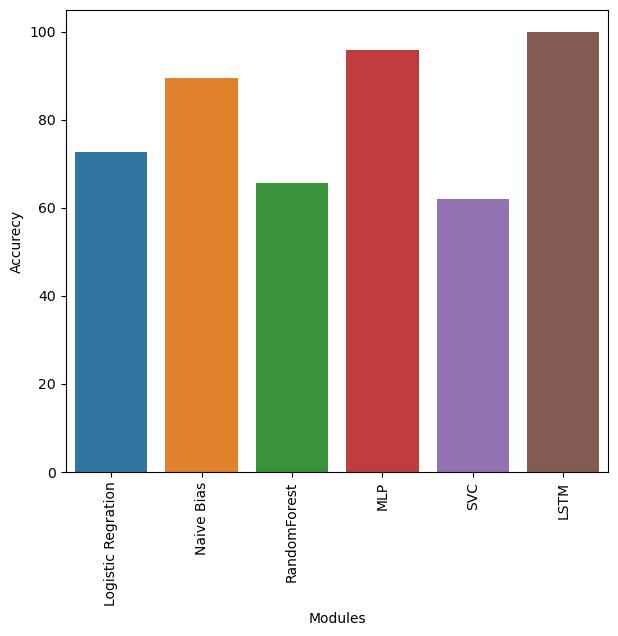

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y=graph.Accurecy,x=graph.Modules)
plt.xticks(rotation='vertical')
plt.show()

# **Prediction**

In [ ]:
x_train.shape

(56761, 24)

**Prediction with CatBoost**

In [ ]:
input = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]

In [ ]:
cb_out = ml.predict(input)
cb_out

C:\Users\ymts0630\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
if cb_out == 0:
    print("its not emergency case")
else:
    print("its emergency case")

its emergency case


In [ ]:
input1 = [[49,14,0,0,0,1,0,0,9,10,11,12,13,14,15,16,17,18,19,256,23,287,26,24]]

In [ ]:
cb_out = ml.predict(input1)
cb_out

C:\Users\ymts0630\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
if cb_out == 0:
    print("its not emergency case")
else:
    print("its emergency case")

its not emergency case
